In [1]:
from models.u2net.model import export_u2net_model
from utils.display import display
from utils.metrics import RoundedAccuracy, RoundedMeanIoU

import numpy as np
import tensorflow as tf
import keras

tf.debugging.disable_traceback_filtering()

In [2]:
TEST_DIR = "./datasets/DUTS-TE/"
TRAINING_IMAGE_SHAPE = (320, 320, 3)

In [3]:
# Загрузка сырой обученной модели
saved_model = keras.models.load_model('./serving/models/u2net/2', custom_objects={
    "RoundedAccuracy": RoundedAccuracy,
    "RoundedMeanIoU": RoundedMeanIoU,
})

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-05-28 12:31:53.345625: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-28 12:31:53.345986: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# Сохраняем pipeline
tf.saved_model.save(saved_model, export_dir='./serving/models/u2net/3',
    signatures={
        "serving_default": export_u2net_model(saved_model, TRAINING_IMAGE_SHAPE[0], TRAINING_IMAGE_SHAPE[1])},
)

INFO:tensorflow:Assets written to: ./serving/models/u2net/4/assets


INFO:tensorflow:Assets written to: ./serving/models/u2net/4/assets


In [5]:
saved_pipline = tf.saved_model.load('./serving/models/u2net/3')

2023-05-28 12:32:30.606080: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-28 12:32:30.624619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


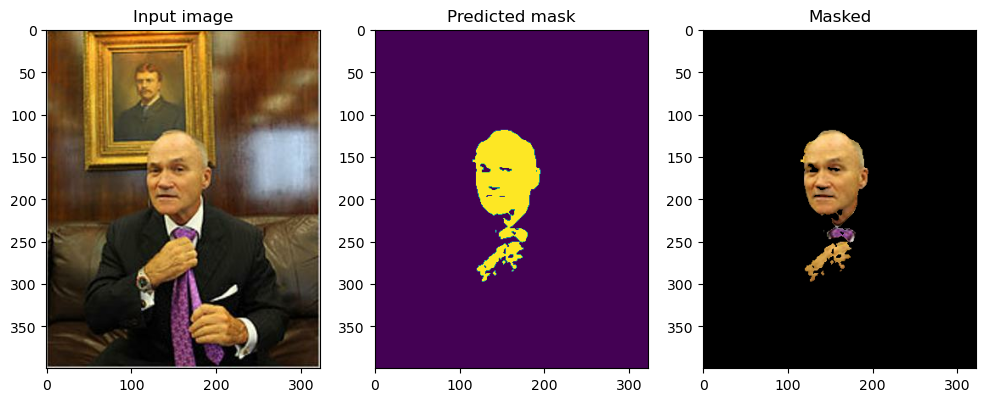

In [6]:
img = tf.io.read_file('./datasets/DUTS-TE/Image/ILSVRC2012_test_00000026.jpg')
img = tf.image.decode_image(img, channels=3, expand_animations=False)
pred_mask = saved_pipline.signatures["serving_default"](img)['mask']
display([img, pred_mask, np.multiply(img, pred_mask)], ["Input image", "Predicted mask", "Masked"])